In [36]:
import zipfile
import os

zip_path = "/content/OneDrive_2025-04-30.zip"
extract_path = "/content/extracted_articles"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

top_level = os.listdir(extract_path)
top_level

['Project Articles']

In [37]:
project_articles_path = os.path.join(extract_path, "Project Articles")
brand_folders = os.listdir(project_articles_path)
brand_folders

['Moncler', 'Kering', 'Tapestry', 'Burberry', 'Louis Vuitton']

In [38]:
burberry_path = os.path.join(project_articles_path, 'Burberry')
burberry_ambassadors = os.listdir(burberry_path)
burberry_ambassadors

['Zhang Jingyi', 'Barry Keoghan']

In [39]:
keoghan_path = os.path.join(burberry_path, 'Barry Keoghan')
keoghan_time_windows = os.listdir(keoghan_path)
keoghan_time_windows

['announcement', 'after', 'before']

In [40]:
announcement_path = os.path.join(keoghan_path, 'announcement')
announcement_files = os.listdir(announcement_path)
announcement_files

['EXCLUSIVE__Burberry_Names__Saltburn__Star_Barry_Keoghan_Brand_Ambassador.txt',
 'WHSmith_names_Burberry_exec_as_new_CFO.txt']

In [41]:
sample_file_path = os.path.join(announcement_path, announcement_files[0])
with open(sample_file_path, 'r', encoding='utf-8') as f:
    sample_text = f.read()

sample_text[:1000]

'EXCLUSIVE: Burberry Names ‘Saltburn’ Star Barry Keoghan Brand Ambassador\n\nDOUBLE B: Burberry has named Irish actor Barry Keoghan as its latest brand ambassador.\n\nIn an image released by the brand, the actor is wearing a black trenchcoat, one of Burberry’s signature items.\n\nThe “Saltburn” star attended Daniel Lee’s fall 2024 show held in Victoria Park in East London in February.\n\n“I’ve been a fan of Burberry for many years now. It’s such an iconic heritage brand with innovation at its heart, and a commitment to supporting arts and culture. I’m very excited to be a part of this next chapter,” the actor said.\n\nYou May Also Like\n\nBarry Keoghan at the 2023 Met Gala celebrating “Karl Lagerfeld: A Line of Beauty.” Getty Images for The Met Museum/Vogue/Courtesy of Burberry\n\nKeoghan attended the 2023 Met Gala, which honored the legendary Karl Lagerfeld, wearing a blue tartan suit with a matching blue rose in the pocket of his double-breasted blazer.\n\n“His raw, unique talent is 

In [42]:
import pandas as pd
from textblob import TextBlob

results = []

for brand in os.listdir(project_articles_path):
    brand_path = os.path.join(project_articles_path, brand)
    if not os.path.isdir(brand_path): continue

    for ambassador in os.listdir(brand_path):
        ambassador_path = os.path.join(brand_path, ambassador)
        if not os.path.isdir(ambassador_path): continue

        for time_window in ["before", "announcement", "after"]:
            time_path = os.path.join(ambassador_path, time_window)
            if not os.path.isdir(time_path): continue

            for filename in os.listdir(time_path):
                if filename.endswith(".txt"):
                    file_path = os.path.join(time_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        text = file.read()

                    blob = TextBlob(text)
                    polarity = blob.sentiment.polarity
                    subjectivity = blob.sentiment.subjectivity

                    results.append({
                        "brand": brand,
                        "ambassador": ambassador,
                        "time_window": time_window,
                        "filename": filename,
                        "polarity": polarity,
                        "subjectivity": subjectivity
                    })

# create DataFrame
sentiment_df = pd.DataFrame(results)
sentiment_df.head()

,brand,ambassador,time_window,filename,polarity,subjectivity
0,Moncler,ASAP Rocky,before,Moncler_CEO_Outlines_Latest__Genius__Strategy.txt,0.188417,0.533136
1,Moncler,ASAP Rocky,before,Moncler_Launches__The_City_of_Genius__Featurin...,0.083827,0.327192
2,Moncler,ASAP Rocky,after,Donald_Glover__Rick_Owens__A_AP_Rocky__and_Edw...,0.128261,0.389855
3,Moncler,ASAP Rocky,after,How_Moncler__A_AP_Rocky__and_Rick_Owens_threw_...,0.143009,0.485741
4,Moncler,ASAP Rocky,after,Moncler_Group_s_Sales_Fall_3__in_Q3_2024.txt,0.180026,0.499339


In [43]:
custom_colors = ["#6f5e4f", "#e3bbbd", "#97976a", "#A67F78", "#F18C8C", "#f7efda"]

<Axes: title={'center': 'Average Sentiment by Brand'}, xlabel='brand', ylabel='Polarity'>

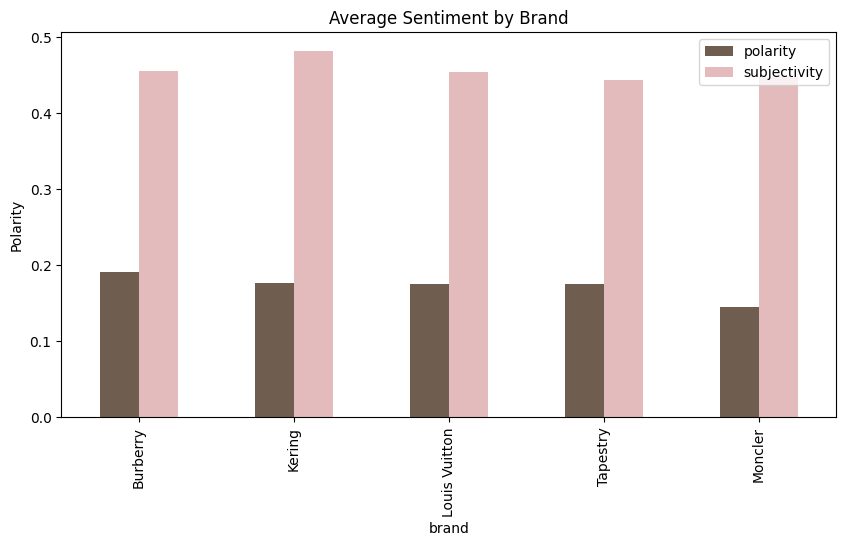

In [44]:
# pink and green palete
brand_avg = sentiment_df.groupby("brand")[["polarity", "subjectivity"]].mean().sort_values("polarity", ascending=False)
brand_avg.plot(
    kind="bar",
    figsize=(10, 5),
    title="Average Sentiment by Brand",
    ylabel="Polarity",
    color=custom_colors[:len(brand_avg.columns)]  # Apply colors to each metric
)

<ipython-input-45-3b3e64bbbf24>:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=sentiment_df, x="ambassador", y="polarity", hue="brand", palette=custom_colors)


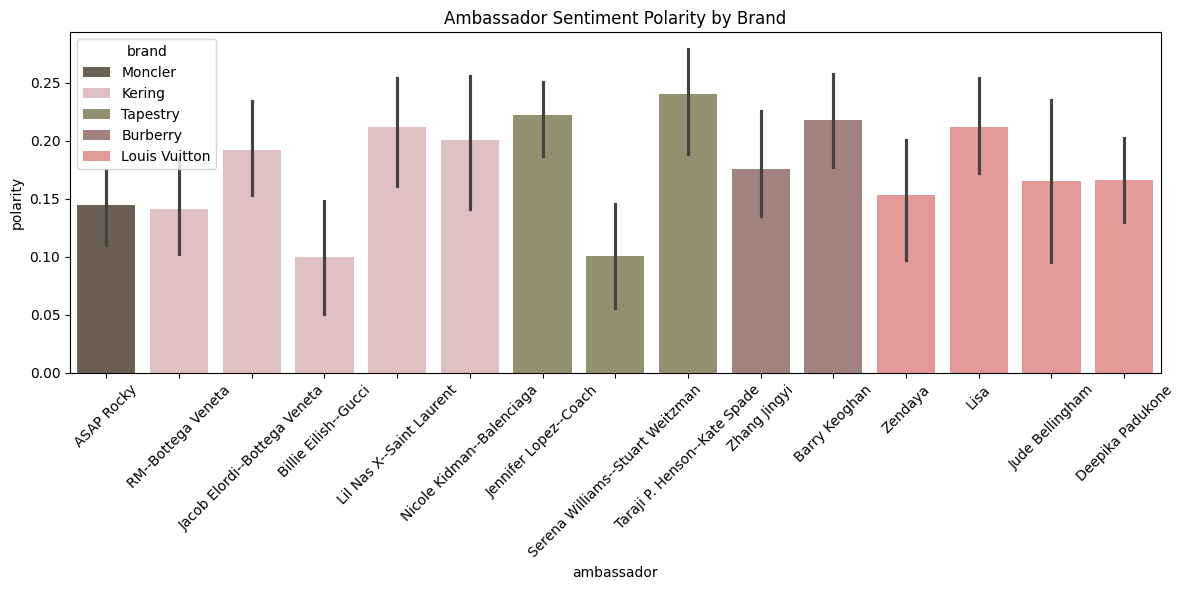

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_df, x="ambassador", y="polarity", hue="brand", palette=custom_colors)
plt.xticks(rotation=45)
plt.title("Ambassador Sentiment Polarity by Brand")
plt.tight_layout()
plt.show()

<ipython-input-46-da18d2961bb2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sentiment_df, x="time_window", y="polarity", order=time_order, palette=custom_colors)
<ipython-input-46-da18d2961bb2>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(data=sentiment_df, x="time_window", y="polarity", order=time_order, palette=custom_colors)


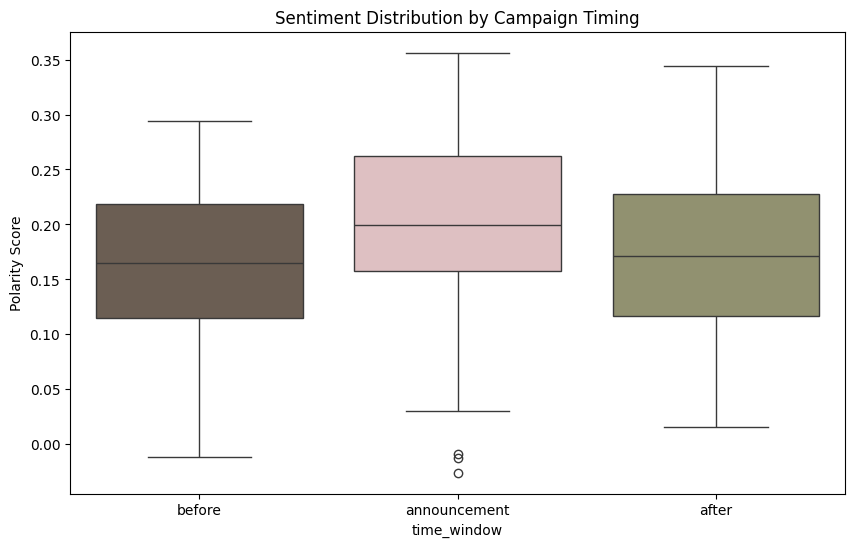

In [46]:
time_order = ["before", "announcement", "after"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=sentiment_df, x="time_window", y="polarity", order=time_order, palette=custom_colors)
plt.title("Sentiment Distribution by Campaign Timing")
plt.ylabel("Polarity Score")
plt.show()

<Axes: title={'center': 'Polarity Change Before vs After'}, xlabel='brand,ambassador'>

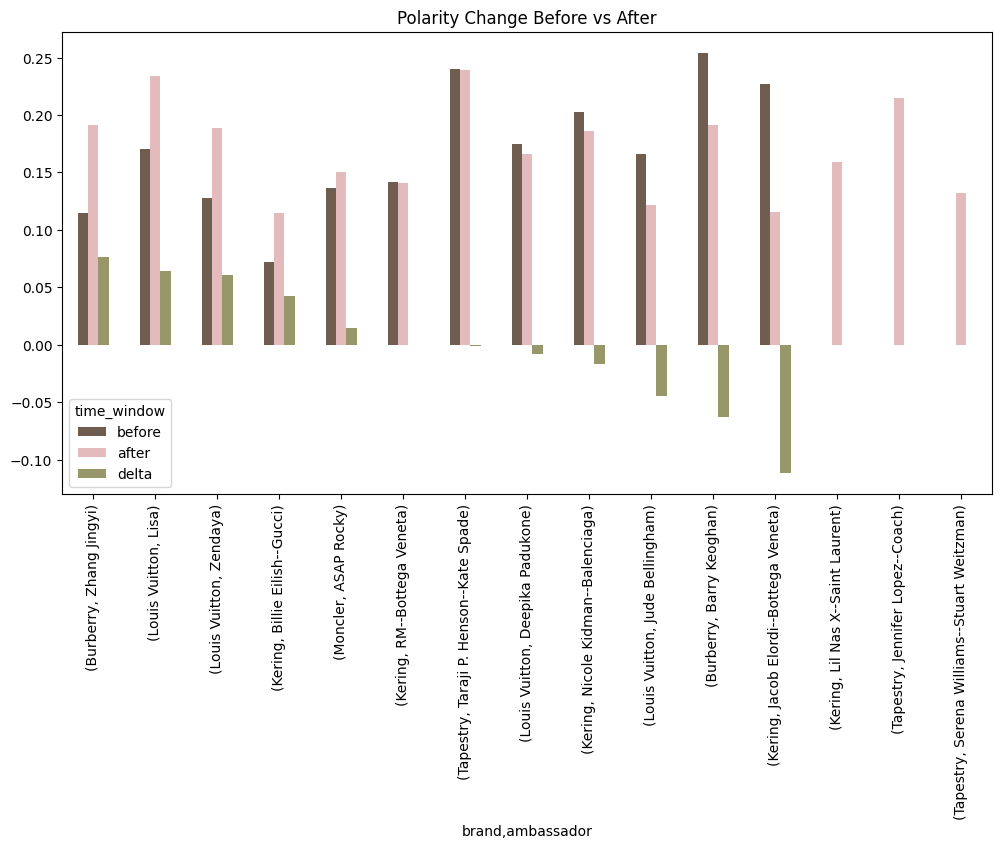

In [47]:
delta = (
    sentiment_df.pivot_table(index=["brand", "ambassador"],
                              columns="time_window",
                              values="polarity", aggfunc="mean")
    .assign(delta=lambda df: df["after"] - df["before"])
    .sort_values("delta", ascending=False)
)

delta[["before", "after", "delta"]].plot(kind="bar", figsize=(12,6), title="Polarity Change Before vs After", color=custom_colors)

In [48]:
# setting by occupation
occupation_map = {
    "Jennifer Lopez–Coach": "Singer",
    "Taraji P. Henson–Kate Spade": "Actor",
    "Serena Williams–Stuart Weitzman": "Athlete",
    "ASAP Rocky": "Singer",
    "Zendaya": "Actor",
    "Lisa": "Singer",
    "Deepika Padukone": "Actor",
    "Jude Bellingham": "Athlete",
    "Barry Keoghan": "Actor",
    "Zhang Jingyi": "Actor",
    "Jacob Elordi–Bottega Veneta": "Actor",
    "Billie Eilish–Gucci": "Singer",
    "Nicole Kidman–Balenciaga": "Actor",
    "RM–Bottega Veneta": "Singer",
    "Lil Nas X–Saint Laurent": "Singer"
}

sentiment_df["occupation"] = sentiment_df["ambassador"].map(occupation_map)


<Axes: title={'center': 'Average Sentiment Polarity by Occupation'}, xlabel='occupation', ylabel='Polarity'>

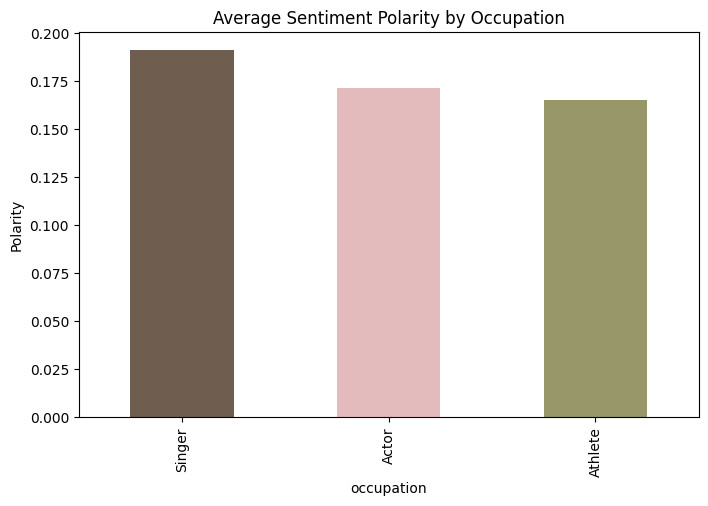

In [50]:
occupation_avg = sentiment_df.groupby("occupation")["polarity"].mean().sort_values(ascending=False)
occupation_avg.plot(
    kind="bar",
    title="Average Sentiment Polarity by Occupation",
    ylabel="Polarity",
    figsize=(8, 5),
    color=custom_colors[:len(occupation_avg)]
)

<ipython-input-52-da19d9cede4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sentiment_df, x="occupation", y="polarity", palette= custom_colors)
<ipython-input-52-da19d9cede4f>:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(data=sentiment_df, x="occupation", y="polarity", palette= custom_colors)


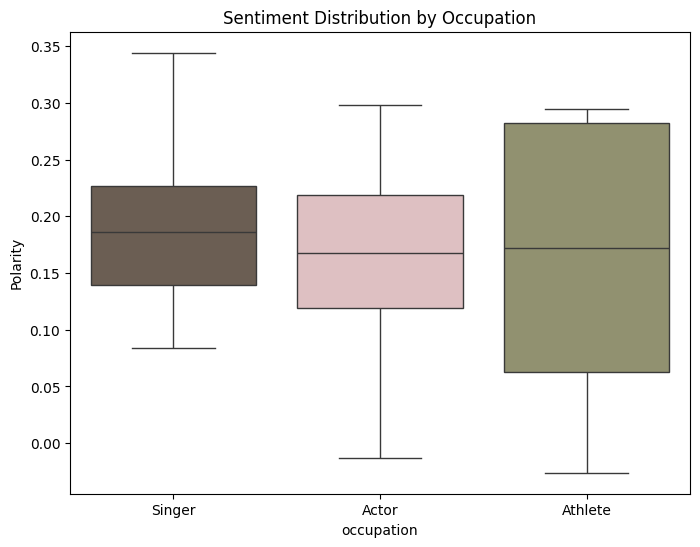

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sentiment_df, x="occupation", y="polarity", palette= custom_colors)
plt.title("Sentiment Distribution by Occupation")
plt.ylabel("Polarity")
plt.show()

<ipython-input-53-d11462d3c359>:8: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=trend_df, x="time_window", y="polarity", hue="occupation", marker="o", sort=False, palette= custom_colors)


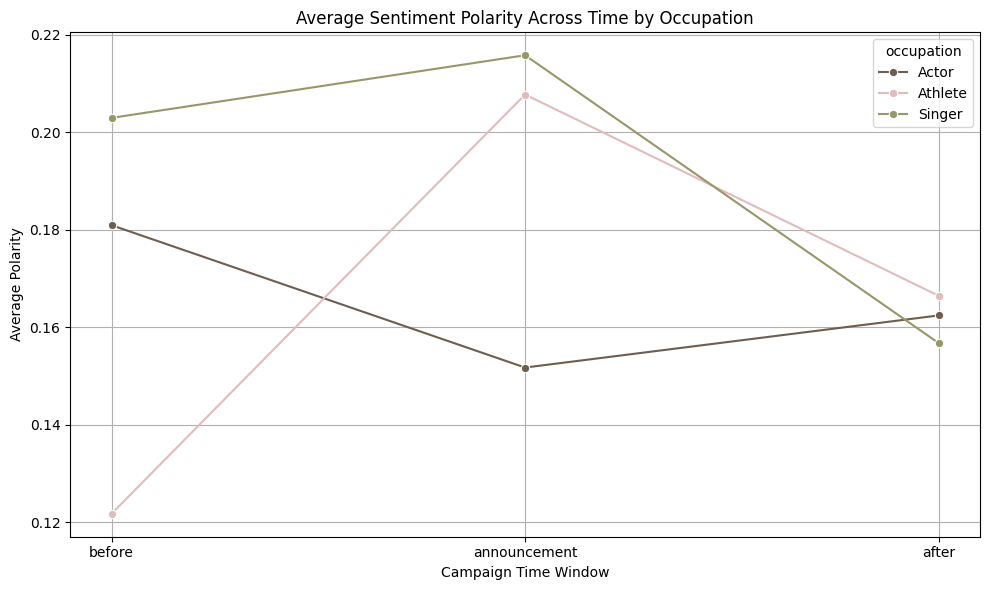

In [53]:
time_order = ["before", "announcement", "after"]

# Group and calculate mean
trend_df = sentiment_df.groupby(["occupation", "time_window"])["polarity"].mean().reset_index()

# Plot line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x="time_window", y="polarity", hue="occupation", marker="o", sort=False, palette= custom_colors)
plt.title("Average Sentiment Polarity Across Time by Occupation")
plt.ylabel("Average Polarity")
plt.xlabel("Campaign Time Window")
plt.xticks(ticks=range(3), labels=time_order)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-54-2142361967b3>:4: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=amb_trend_df, x="time_window", y="polarity", hue="ambassador", marker="o", sort=False, palette=custom_colors)


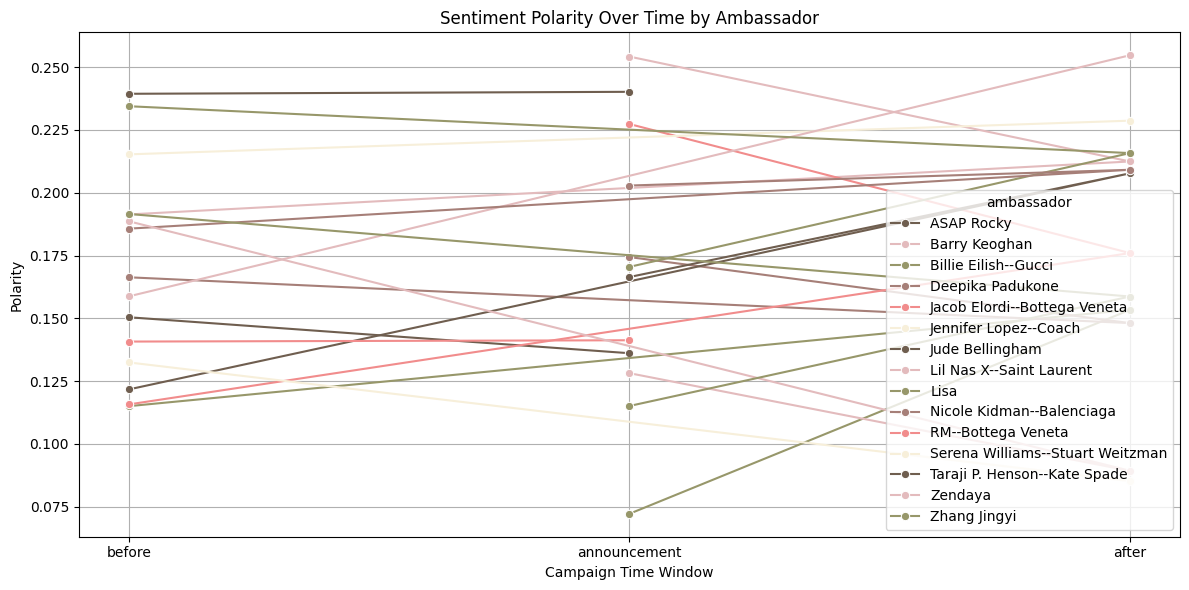

In [54]:
amb_trend_df = sentiment_df.groupby(["ambassador", "time_window"])["polarity"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=amb_trend_df, x="time_window", y="polarity", hue="ambassador", marker="o", sort=False, palette=custom_colors)
plt.title("Sentiment Polarity Over Time by Ambassador")
plt.ylabel("Polarity")
plt.xlabel("Campaign Time Window")
plt.xticks(ticks=range(3), labels=time_order)
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
sentiment_df["occupation_brand"] = sentiment_df["occupation"] + " – " + sentiment_df["brand"]

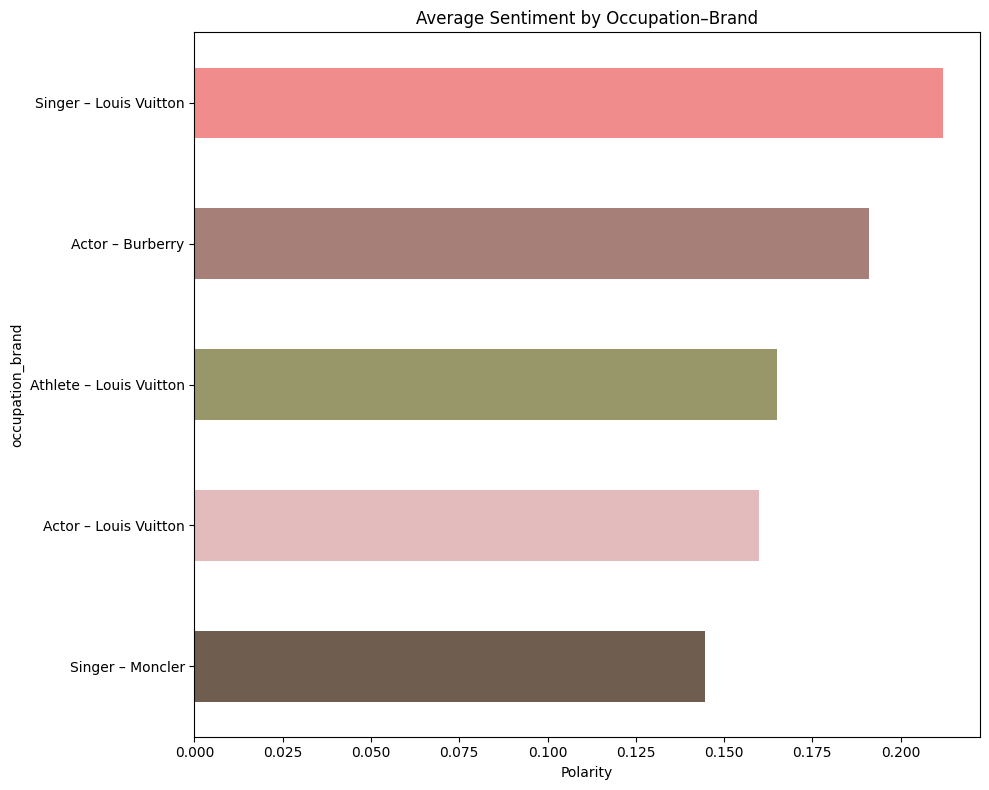

In [61]:
combo_avg = sentiment_df.groupby("occupation_brand")["polarity"].mean().sort_values()

combo_avg.plot(
    kind="barh",
    figsize=(10, 8),
    title="Average Sentiment by Occupation–Brand",
    xlabel="Polarity",
    color=custom_colors[:len(combo_avg)]
)

plt.tight_layout()
plt.show()

In [62]:
sentiment_df["ambassador"].unique()

array(['ASAP Rocky', 'RM--Bottega Veneta', 'Jacob Elordi--Bottega Veneta',
       'Billie Eilish--Gucci', 'Lil Nas X--Saint Laurent',
       'Nicole Kidman--Balenciaga', 'Jennifer Lopez--Coach',
       'Serena Williams--Stuart Weitzman', 'Taraji P. Henson--Kate Spade',
       'Zhang Jingyi', 'Barry Keoghan', 'Zendaya', 'Lisa',
       'Jude Bellingham', 'Deepika Padukone'], dtype=object)

In [63]:
# first vs. second
first_ambassadors = ["RM--Bottega Veneta", "Nicole Kidman--Balenciaga"]

sentiment_df["ambassador_type"] = sentiment_df["ambassador"].apply(
    lambda x: "First Ambassador" if x in first_ambassadors else "Other Ambassadors"
)

<ipython-input-65-1c01fe4ef13d>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=avg_trend, x="time_window", y="polarity", hue="ambassador_type", marker="o", palette=custom_colors)


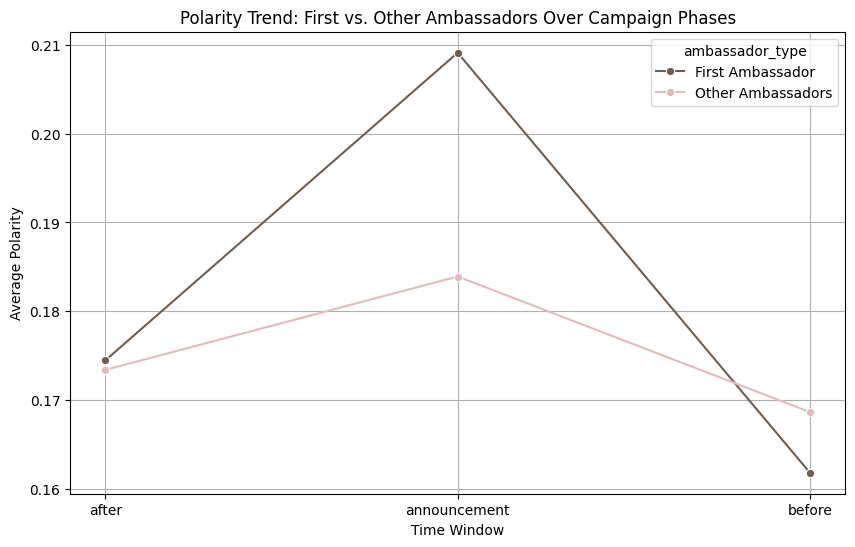

In [65]:
avg_trend = sentiment_df.groupby(["ambassador_type", "time_window"])["polarity"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_trend, x="time_window", y="polarity", hue="ambassador_type", marker="o", palette=custom_colors)
plt.title("Polarity Trend: First vs. Other Ambassadors Over Campaign Phases")
plt.ylabel("Average Polarity")
plt.xlabel("Time Window")
plt.grid(True)
plt.show()

<ipython-input-66-59e6c759b875>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sentiment_df, x="ambassador_type", y="polarity", palette=custom_colors)
<ipython-input-66-59e6c759b875>:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=sentiment_df, x="ambassador_type", y="polarity", palette=custom_colors)


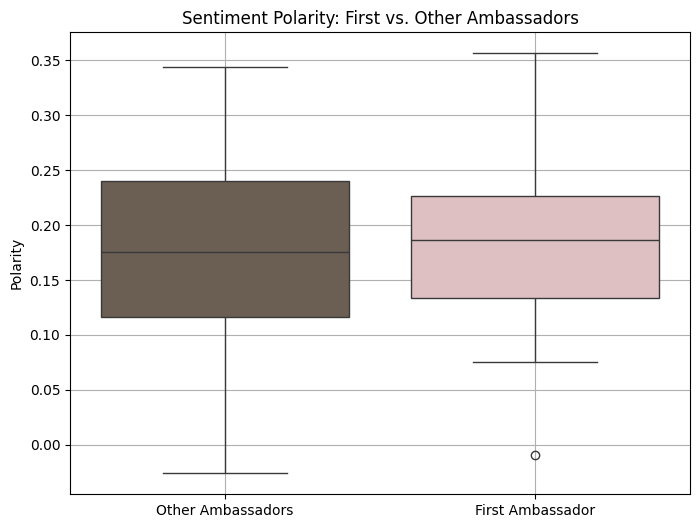

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sentiment_df, x="ambassador_type", y="polarity", palette=custom_colors)
plt.title("Sentiment Polarity: First vs. Other Ambassadors")
plt.ylabel("Polarity")
plt.xlabel("")
plt.grid(True)
plt.show()